In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans   

In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6) 

In [4]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)  

In [5]:
# Load data
df = pd.read_csv('Top500Cleaned.csv')
df.columns = df.columns.str.strip()

# Helper: Composite Score (simple average of normalized ROE5Yr, QtrProfitVar, DivYld)
for col in ['ROE5Yr', 'QtrProfitVar', 'DivYld']:
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df['CompositeScore'] = df[['ROE5Yr_norm', 'QtrProfitVar_norm', 'DivYld_norm']].mean(axis=1) 

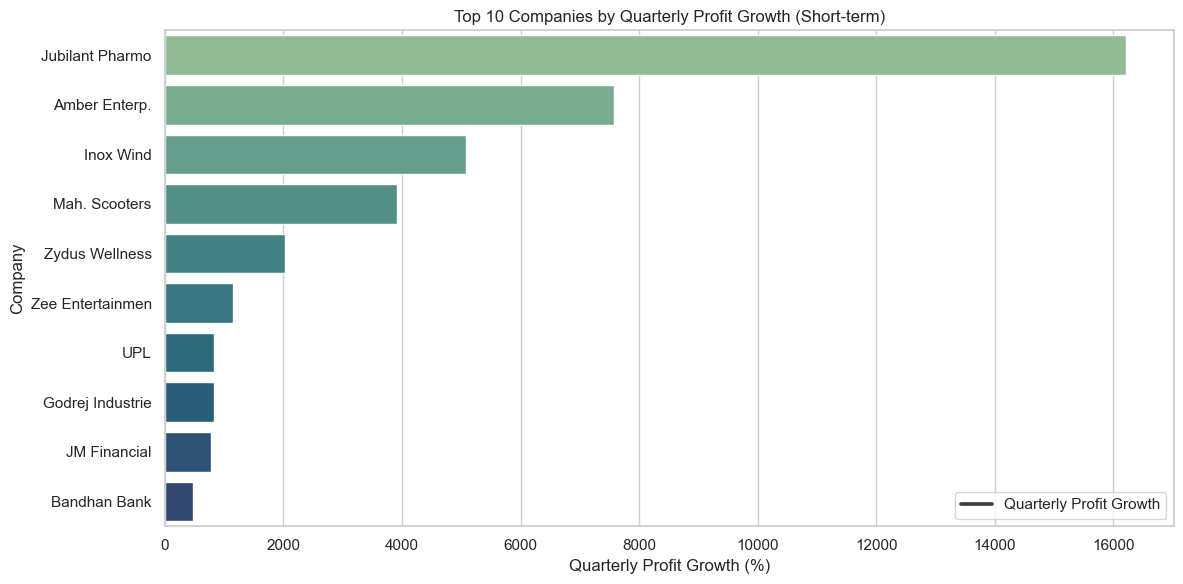

In [6]:
# 1. Top 10 Companies by Recent Quarterly Profit Growth (Short-term)
top10_short = df.nlargest(10, 'QtrProfitVar')
plt.figure(figsize=(12,6))
sns.barplot(x='QtrProfitVar', y='Name', data=top10_short, palette='crest')
plt.title('Top 10 Companies by Quarterly Profit Growth (Short-term)')
plt.xlabel('Quarterly Profit Growth (%)')
plt.ylabel('Company')
plt.legend(['Quarterly Profit Growth'])
plt.tight_layout()
plt.show() 

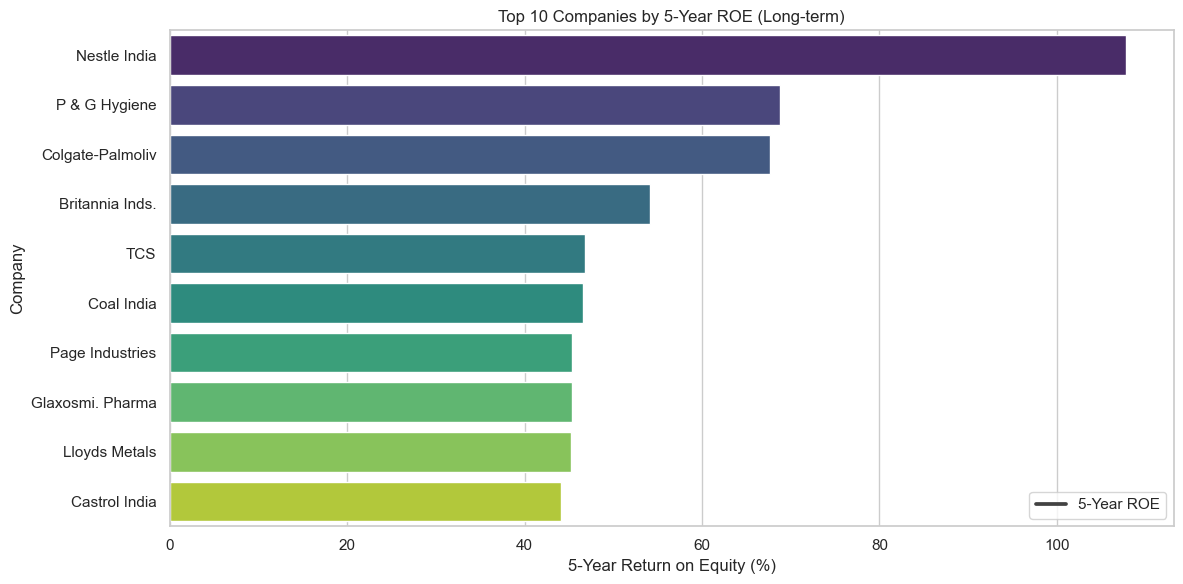

In [7]:
# 2. Top 10 Companies by 5-Year ROE (Long-term)
top10_long = df.nlargest(10, 'ROE5Yr')
plt.figure(figsize=(12,6))
sns.barplot(x='ROE5Yr', y='Name', data=top10_long, palette='viridis')
plt.title('Top 10 Companies by 5-Year ROE (Long-term)')
plt.xlabel('5-Year Return on Equity (%)')
plt.ylabel('Company')
plt.legend(['5-Year ROE'])
plt.tight_layout()
plt.show() 

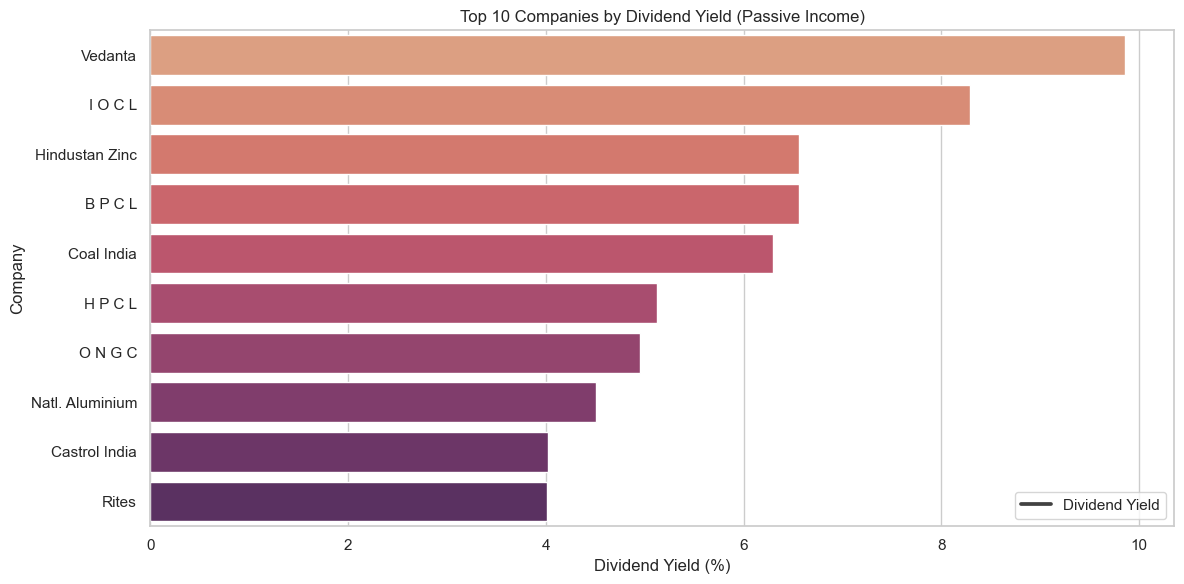

In [8]:
# 3. Top 10 Companies by Dividend Yield (Passive Income)
top10_div = df.nlargest(10, 'DivYld')
plt.figure(figsize=(12,6))
sns.barplot(x='DivYld', y='Name', data=top10_div, palette='flare')
plt.title('Top 10 Companies by Dividend Yield (Passive Income)')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('Company')
plt.legend(['Dividend Yield'])
plt.tight_layout()
plt.show() 

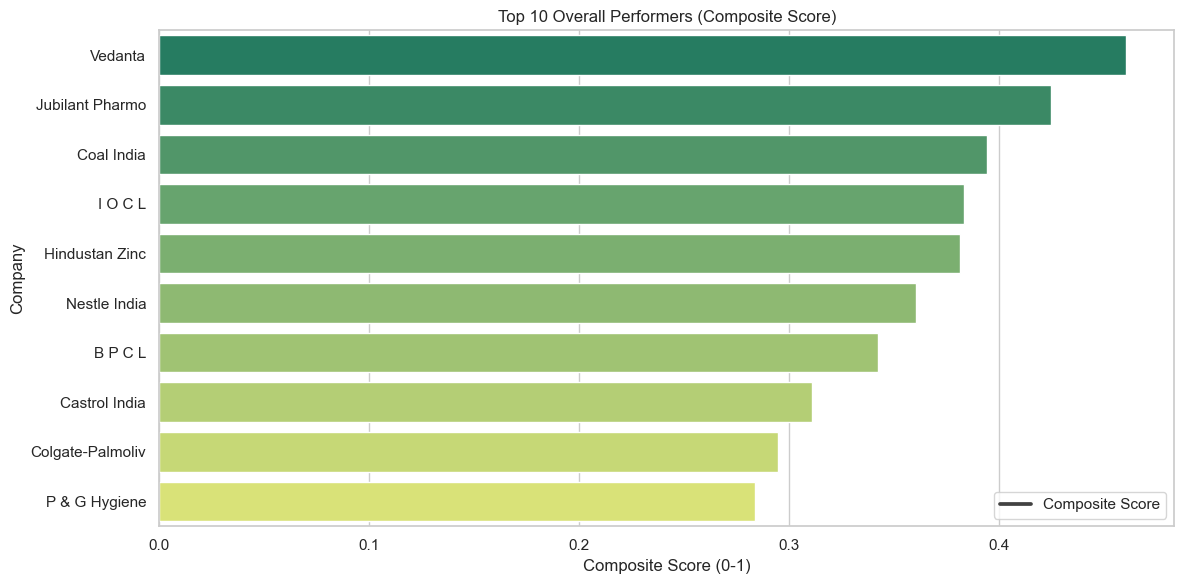

In [9]:
# 4. Top 10 Overall Performers (Composite Score)
top10_perf = df.nlargest(10, 'CompositeScore')
plt.figure(figsize=(12,6))
sns.barplot(x='CompositeScore', y='Name', data=top10_perf, palette='summer')
plt.title('Top 10 Overall Performers (Composite Score)')
plt.xlabel('Composite Score (0-1)')
plt.ylabel('Company')
plt.legend(['Composite Score'])
plt.tight_layout()
plt.show() 

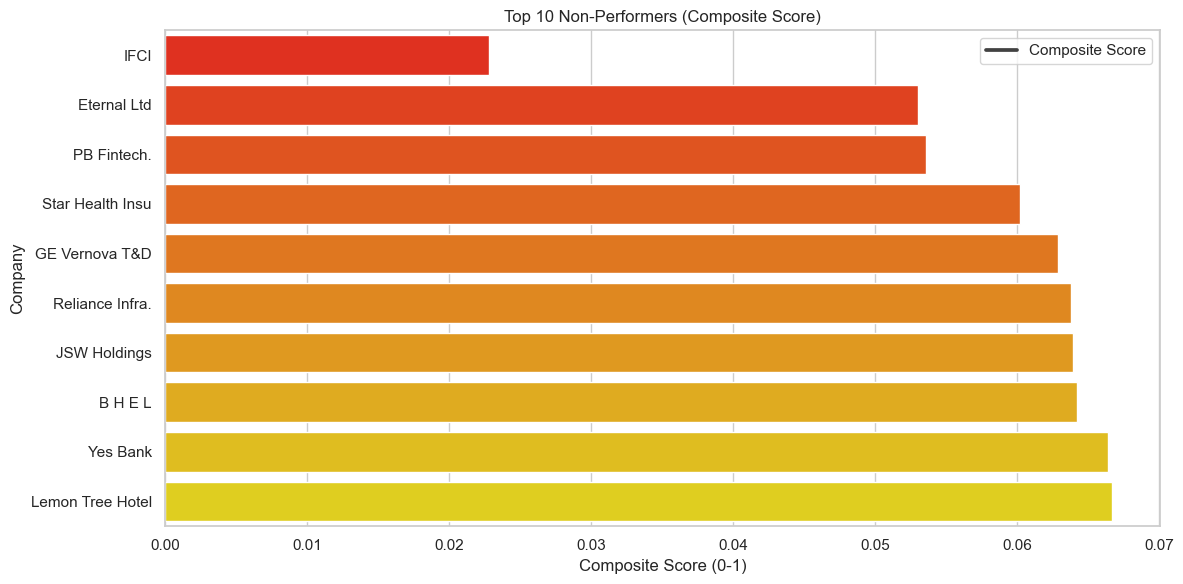

In [10]:
# 5. Top 10 Non-Performers (Lowest Composite Score)
bottom10_perf = df.nsmallest(10, 'CompositeScore')
plt.figure(figsize=(12,6))
sns.barplot(x='CompositeScore', y='Name', data=bottom10_perf, palette='autumn')
plt.title('Top 10 Non-Performers (Composite Score)')
plt.xlabel('Composite Score (0-1)')
plt.ylabel('Company')
plt.legend(['Composite Score'])
plt.tight_layout()
plt.show()

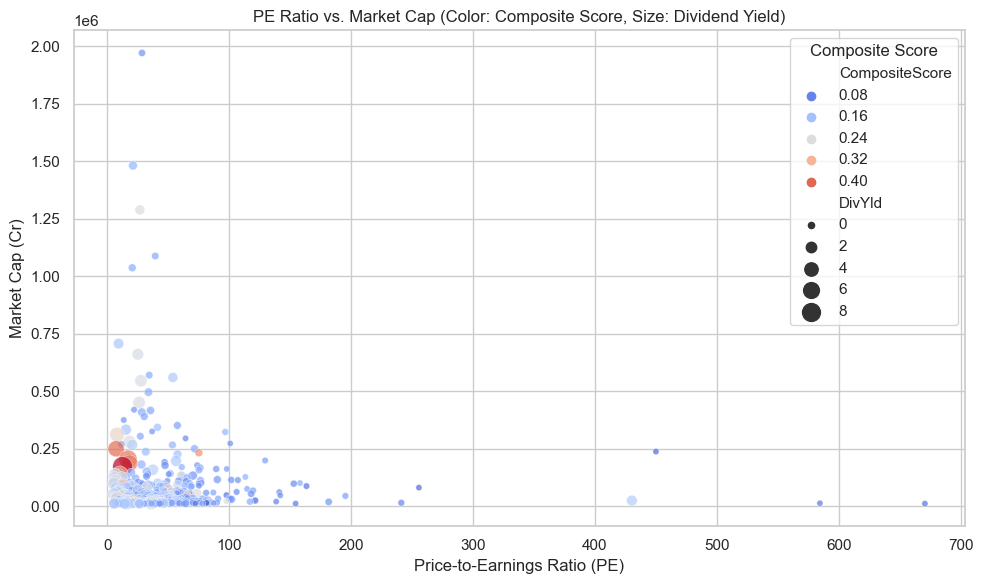

In [11]:
# 6. PE Ratio vs. Market Cap (Value vs. Growth)
plt.figure(figsize=(10,6))
sns.scatterplot(x='PE', y='MarCap', data=df, hue='CompositeScore', palette='coolwarm', size='DivYld', sizes=(20, 200), alpha=0.7)
plt.title('PE Ratio vs. Market Cap (Color: Composite Score, Size: Dividend Yield)')
plt.xlabel('Price-to-Earnings Ratio (PE)')
plt.ylabel('Market Cap (Cr)')
plt.legend(title='Composite Score')
plt.tight_layout()
plt.show()

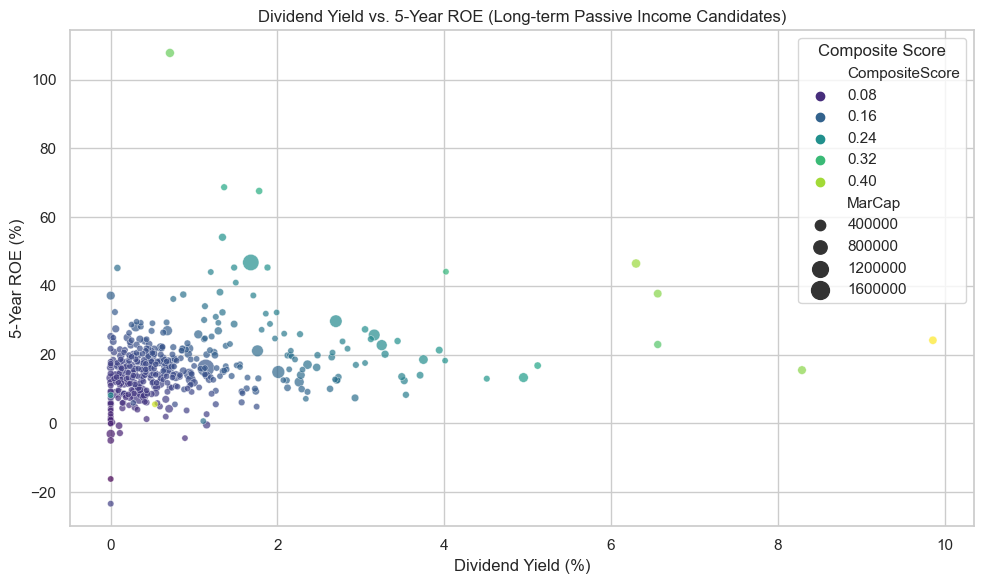

In [12]:
# 7. Dividend Yield vs. ROE (Long-term Passive Income Candidates)
plt.figure(figsize=(10,6))
sns.scatterplot(x='DivYld', y='ROE5Yr', data=df, hue='CompositeScore', palette='viridis', size='MarCap', sizes=(20, 200), alpha=0.7)
plt.title('Dividend Yield vs. 5-Year ROE (Long-term Passive Income Candidates)')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('5-Year ROE (%)')
plt.legend(title='Composite Score')
plt.tight_layout()
plt.show() 

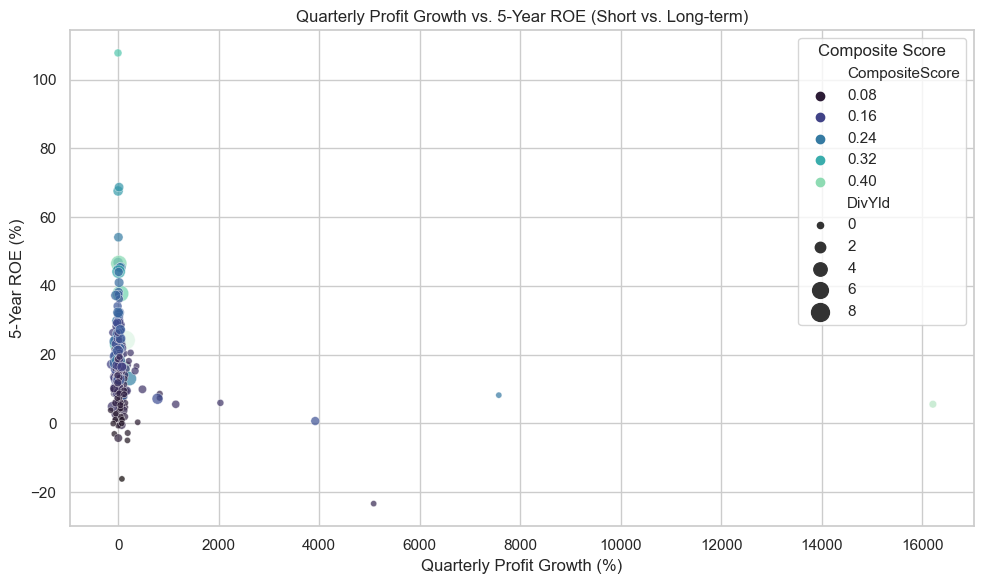

In [13]:
# 8. Quarterly Profit Growth vs. 5-Year ROE (Short vs. Long-term)
plt.figure(figsize=(10,6))
sns.scatterplot(x='QtrProfitVar', y='ROE5Yr', data=df, hue='CompositeScore', palette='mako', size='DivYld', sizes=(20, 200), alpha=0.7)
plt.title('Quarterly Profit Growth vs. 5-Year ROE (Short vs. Long-term)')
plt.xlabel('Quarterly Profit Growth (%)')
plt.ylabel('5-Year ROE (%)')
plt.legend(title='Composite Score')
plt.tight_layout()
plt.show() 

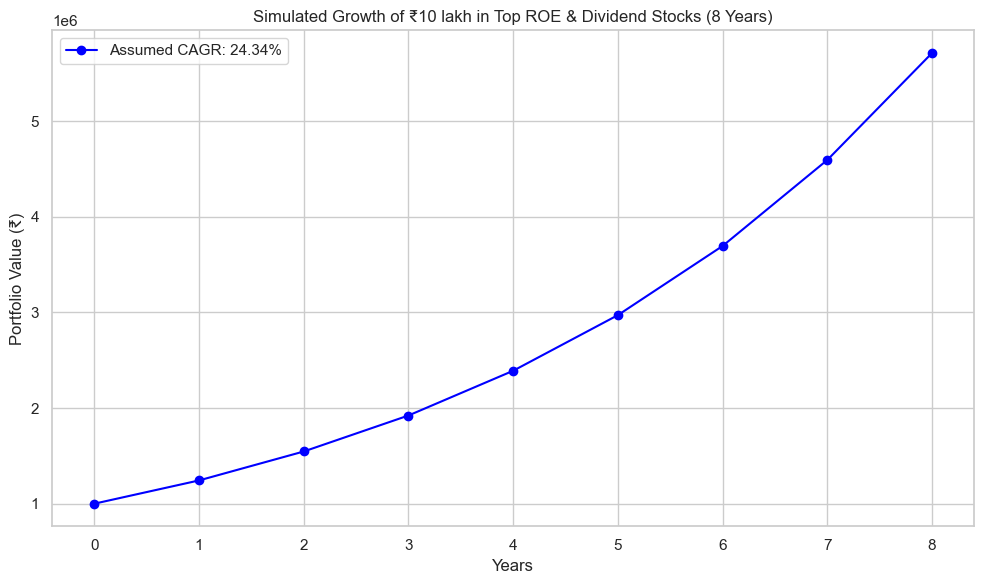

In [15]:
# 10. Investment Strategy Simulation: Growth of ₹10 lakh over 8 years in Top ROE & Dividend Stocks
# Assume CAGR = avg(ROE5Yr, DivYld) for top 10 composite score stocks
top10_strategy = df.nlargest(10, 'CompositeScore')
avg_cagr = (top10_strategy['ROE5Yr'].mean() + top10_strategy['DivYld'].mean()) / 100 / 2
years = np.arange(0,9)
initial = 10_00_000
values = initial * (1 + avg_cagr) ** years
plt.figure(figsize=(10,6))
plt.plot(years, values, marker='o', color='blue')
plt.title('Simulated Growth of ₹10 lakh in Top ROE & Dividend Stocks (8 Years)')
plt.xlabel('Years')
plt.ylabel('Portfolio Value (₹)')
plt.legend([f'Assumed CAGR: {avg_cagr*100:.2f}%'])
plt.grid(True)
plt.tight_layout() 
plt.show() 

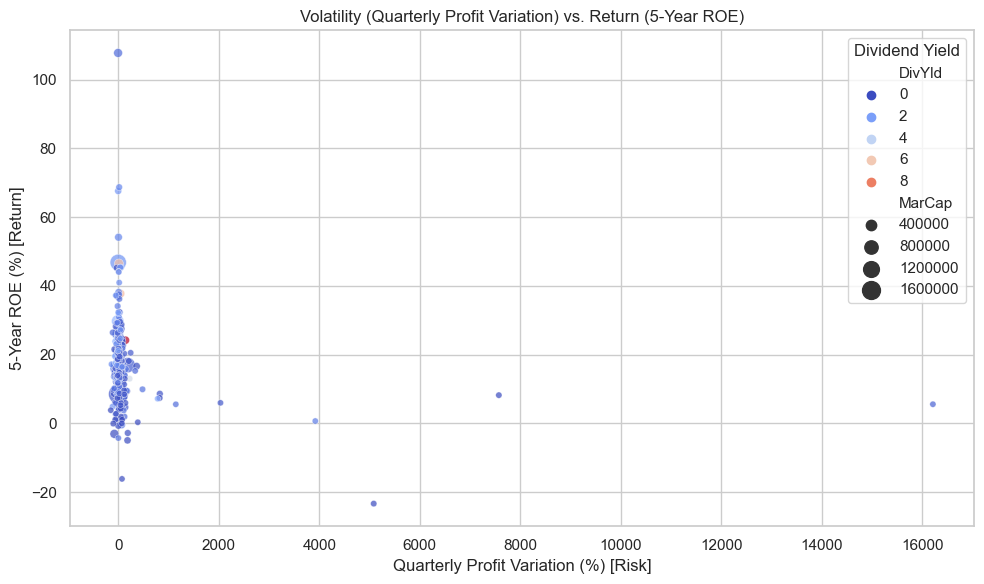

In [16]:
# 1. Volatility vs. Return (Assume 'QtrProfitVar' as proxy for volatility, 'ROE5Yr' for return)
plt.figure(figsize=(10,6))
sns.scatterplot(x='QtrProfitVar', y='ROE5Yr', data=df, hue='DivYld', palette='coolwarm', size='MarCap', sizes=(20,200), alpha=0.7)
plt.title('Volatility (Quarterly Profit Variation) vs. Return (5-Year ROE)')
plt.xlabel('Quarterly Profit Variation (%) [Risk]')
plt.ylabel('5-Year ROE (%) [Return]')
plt.legend(title='Dividend Yield')
plt.tight_layout()
plt.show() 

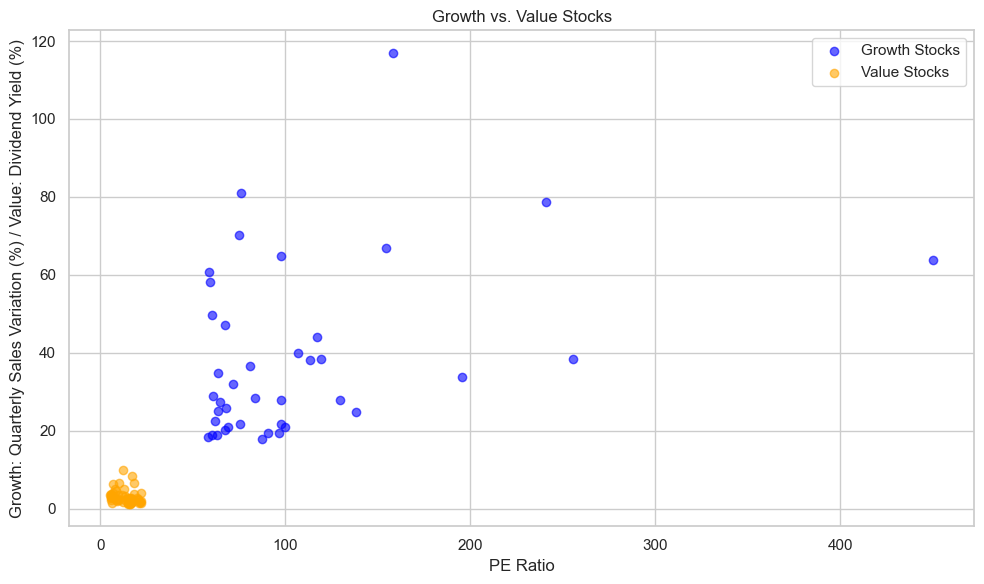

In [17]:
# 2. Growth vs. Value Stocks
# Define growth stocks: High QtrSalesVar, High PE; Value stocks: Low PE, High DivYld
growth = df[(df['QtrSalesVar'] > df['QtrSalesVar'].quantile(0.75)) & (df['PE'] > df['PE'].quantile(0.75))]
value = df[(df['PE'] < df['PE'].quantile(0.25)) & (df['DivYld'] > df['DivYld'].quantile(0.75))]
plt.figure(figsize=(10,6))
plt.scatter(growth['PE'], growth['QtrSalesVar'], color='blue', label='Growth Stocks', alpha=0.6)
plt.scatter(value['PE'], value['DivYld'], color='orange', label='Value Stocks', alpha=0.6)
plt.title('Growth vs. Value Stocks')
plt.xlabel('PE Ratio')
plt.ylabel('Growth: Quarterly Sales Variation (%) / Value: Dividend Yield (%)')
plt.legend()
plt.tight_layout()
plt.show() 

In [22]:
# Radar chart setup
def make_radar(names, values, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    values += values[:1]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=names)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    plt.title(title, size=16, y=1.08)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()


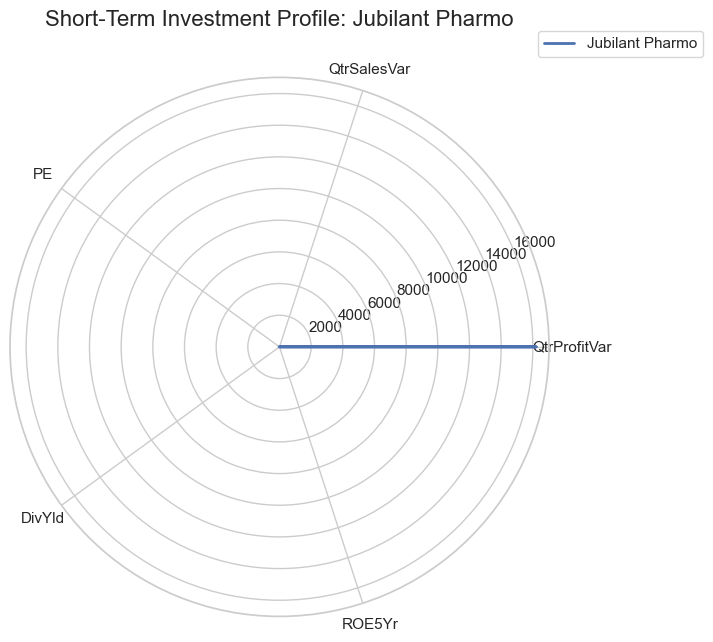

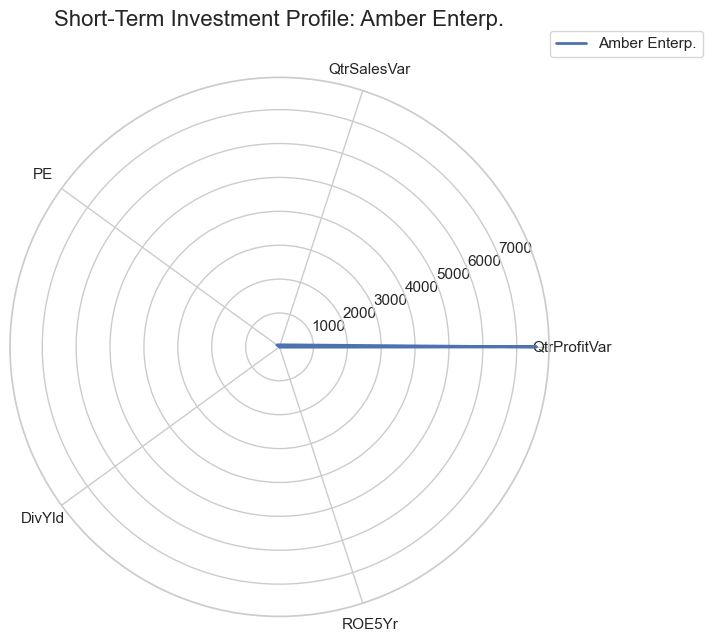

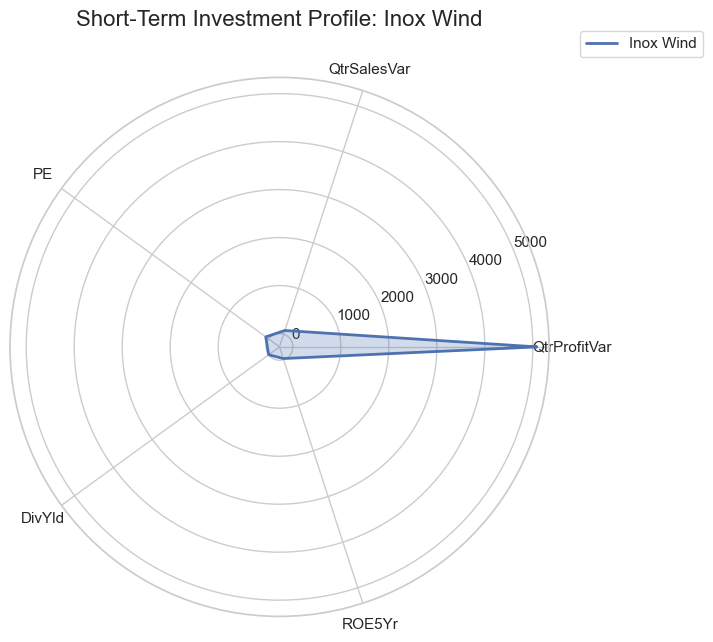

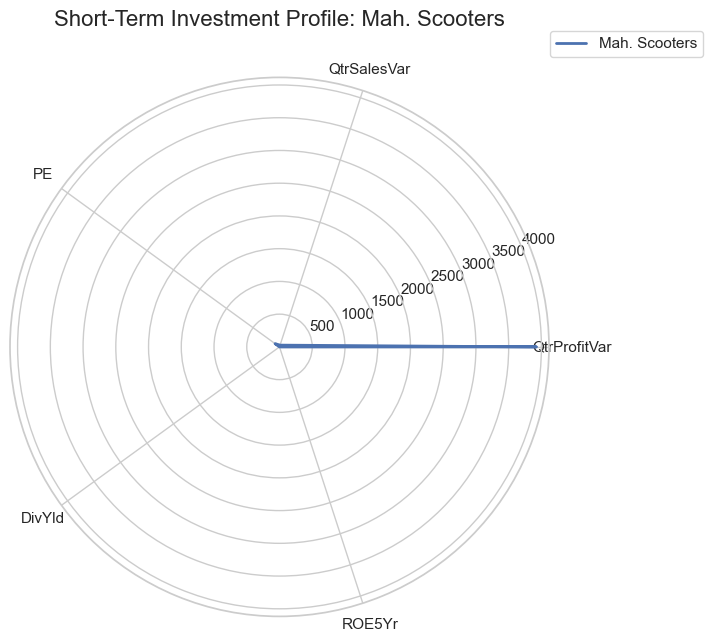

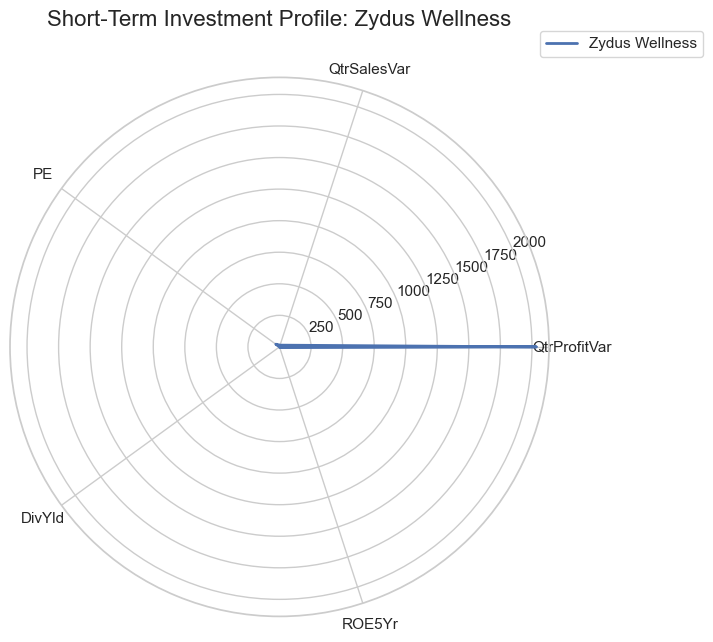

In [23]:
top5_short = df.nlargest(5, 'QtrProfitVar')
categories = ['QtrProfitVar', 'QtrSalesVar', 'PE', 'DivYld', 'ROE5Yr']
for idx, row in top5_short.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Short-Term Investment Profile: {row['Name']}")

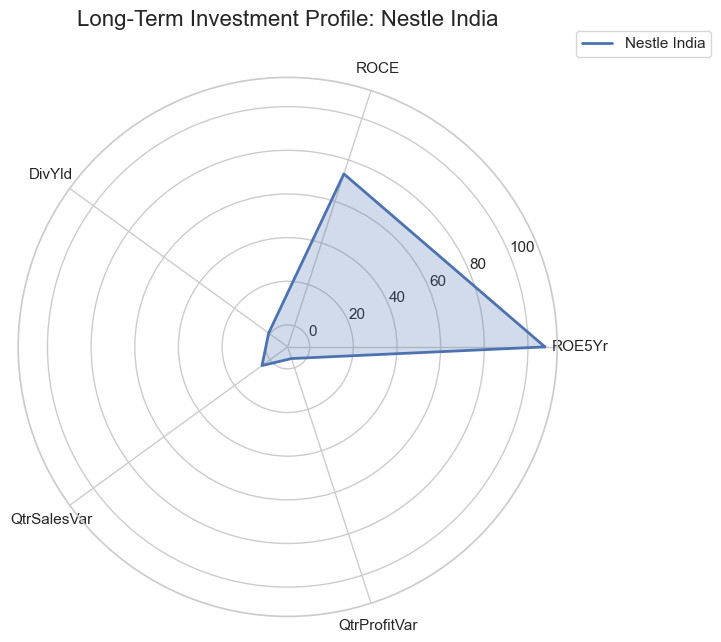

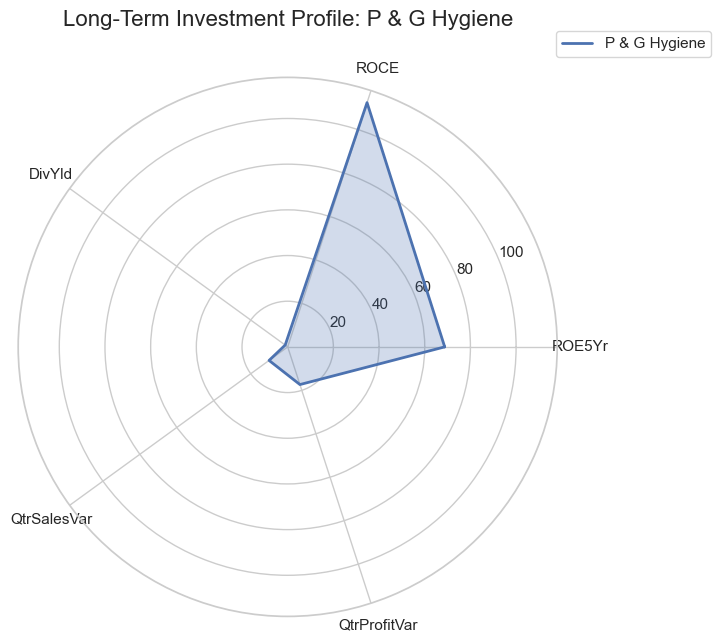

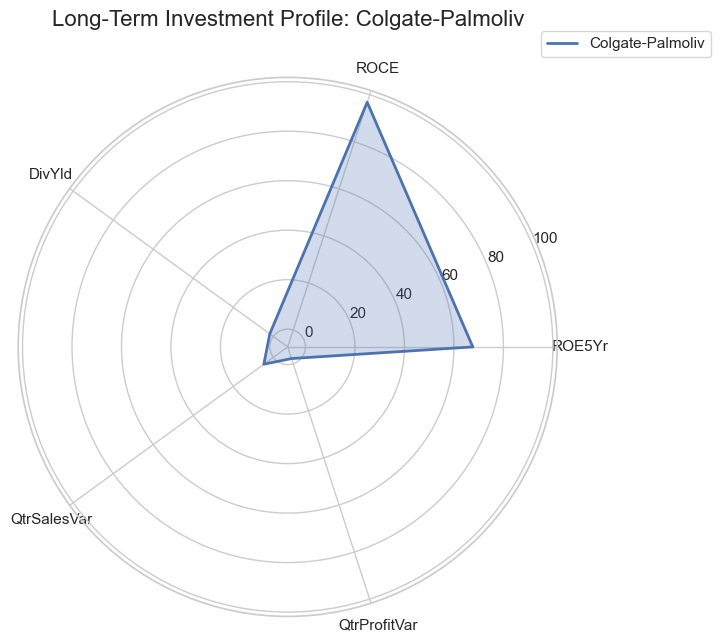

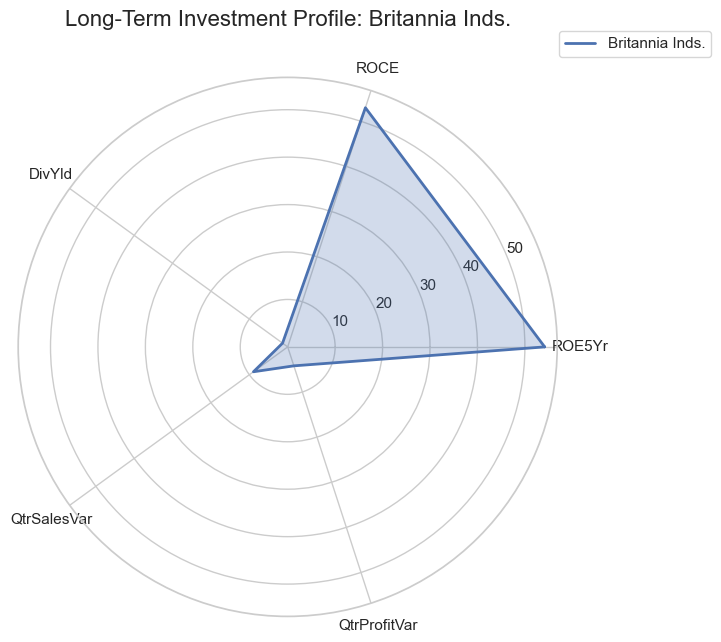

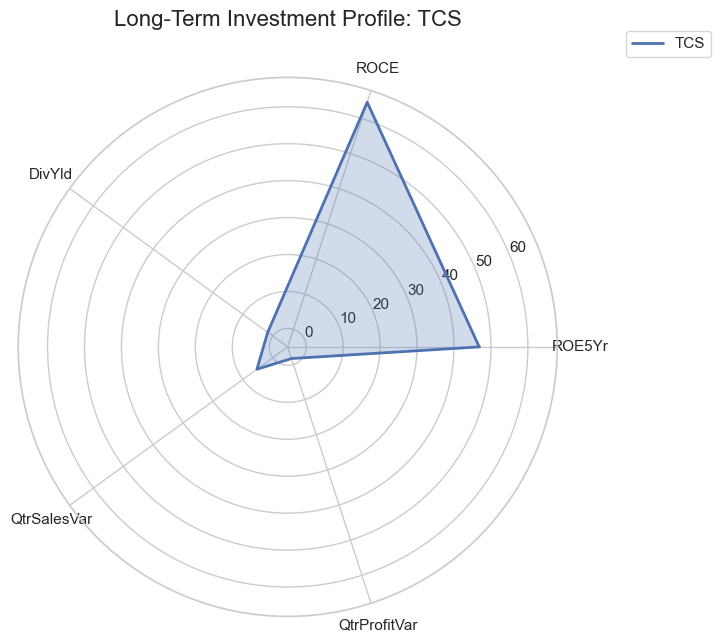

In [25]:
 #Select top 5 by 5-Year ROE
top5_long = df.nlargest(5, 'ROE5Yr')
categories = ['ROE5Yr', 'ROCE', 'DivYld', 'QtrSalesVar', 'QtrProfitVar']
for idx, row in top5_long.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Long-Term Investment Profile: {row['Name']}")

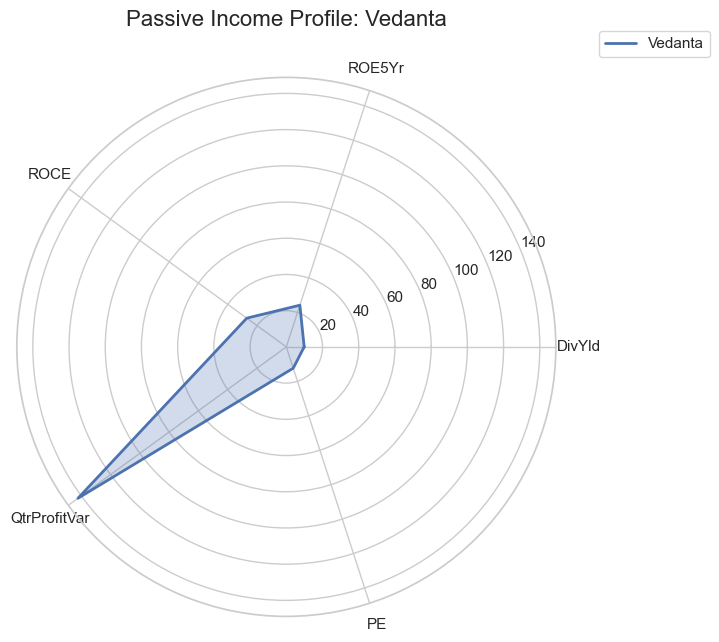

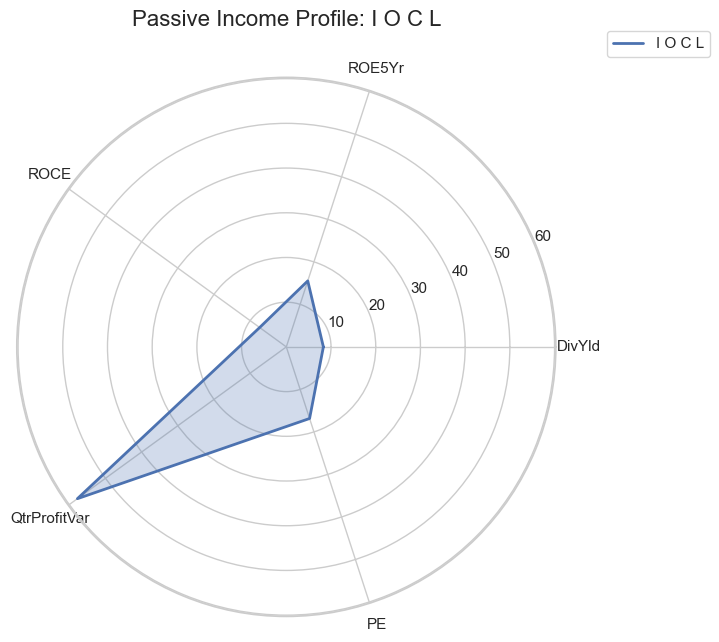

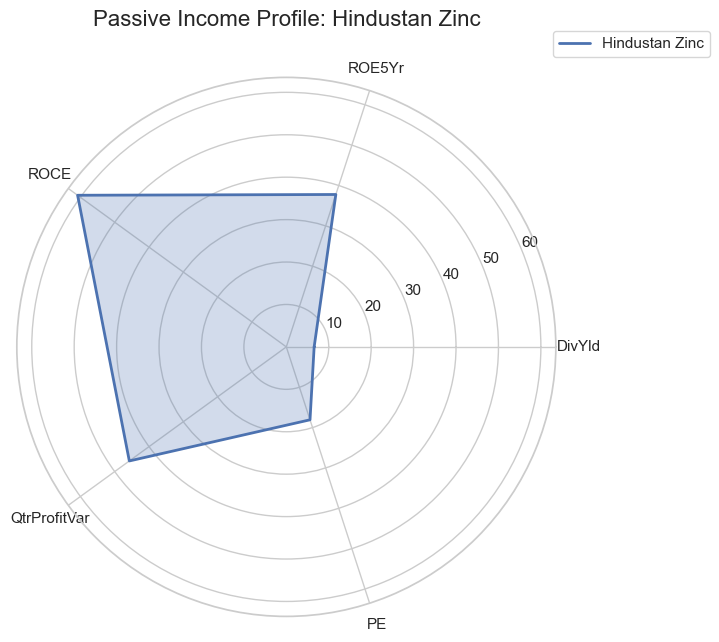

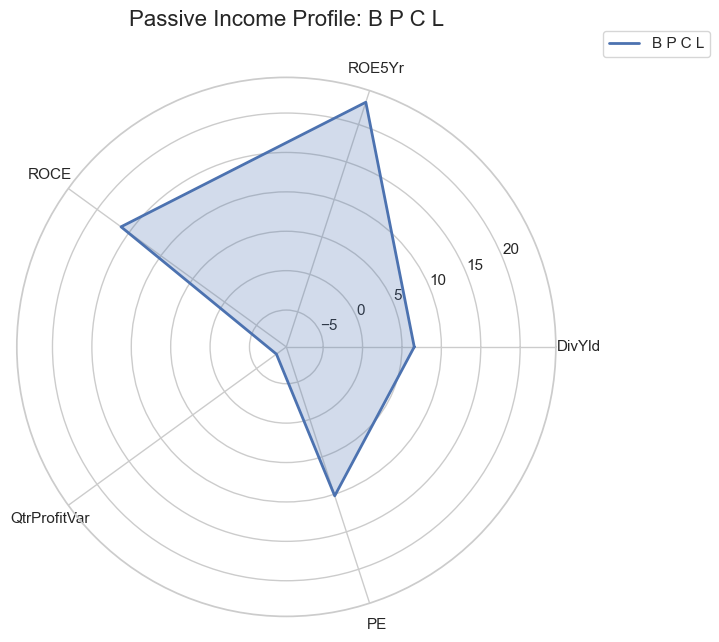

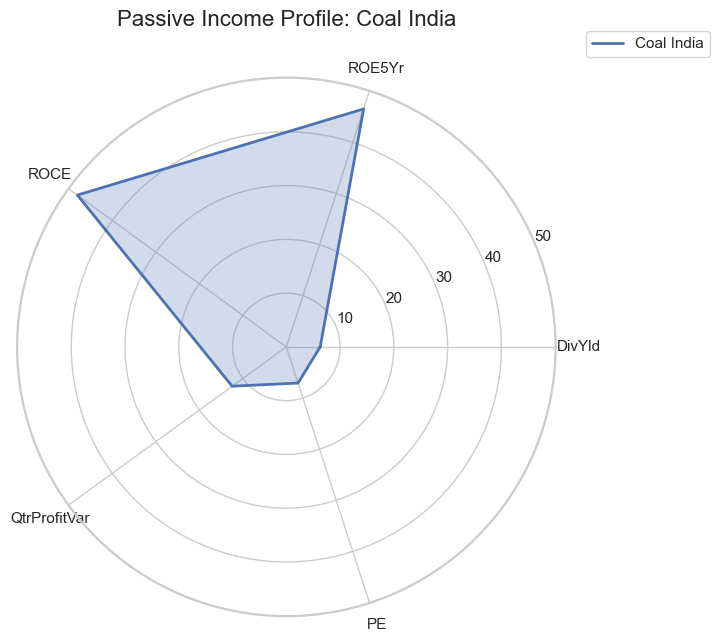

In [26]:
# Select top 5 by Dividend Yield
top5_div = df.nlargest(5, 'DivYld')
categories = ['DivYld', 'ROE5Yr', 'ROCE', 'QtrProfitVar', 'PE']
for idx, row in top5_div.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Passive Income Profile: {row['Name']}") 

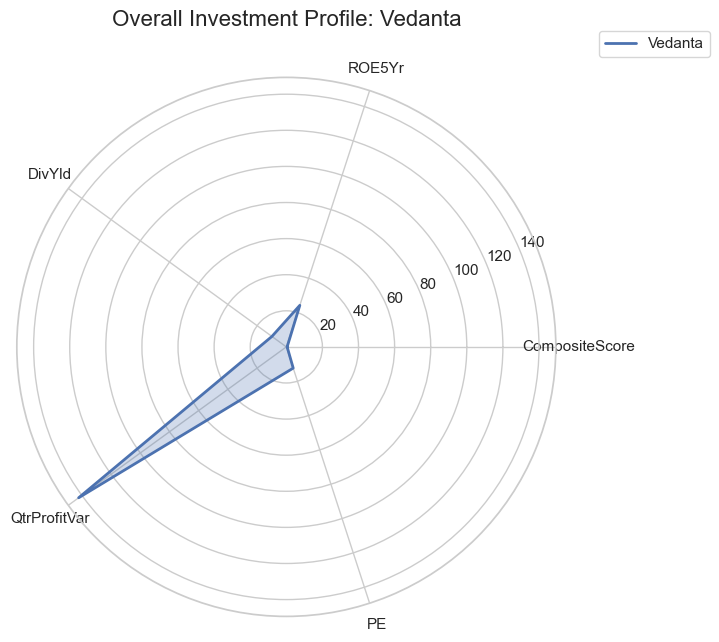

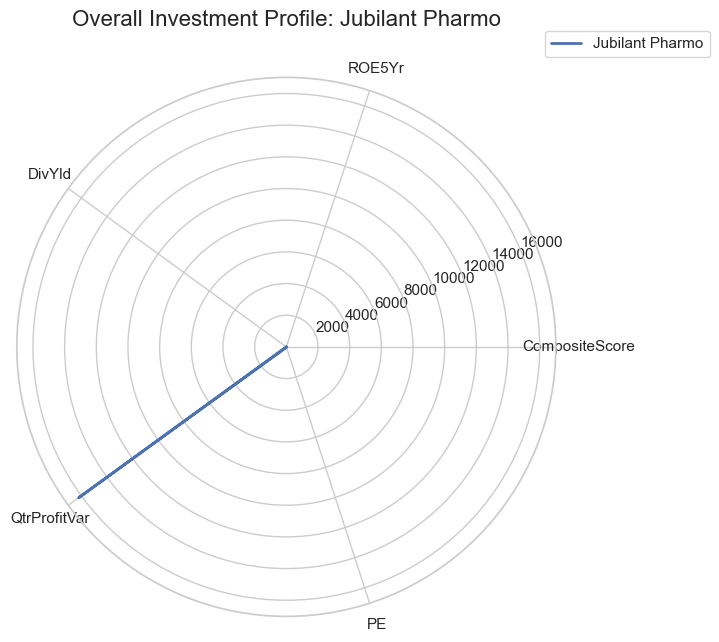

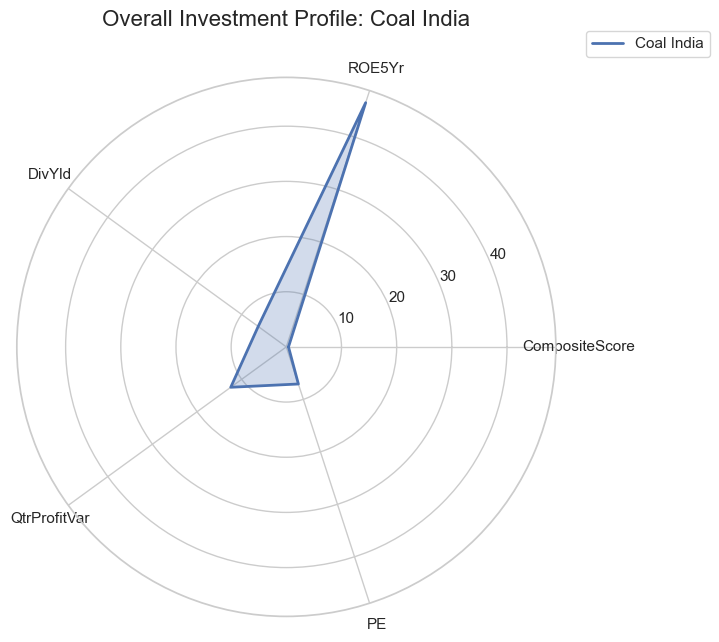

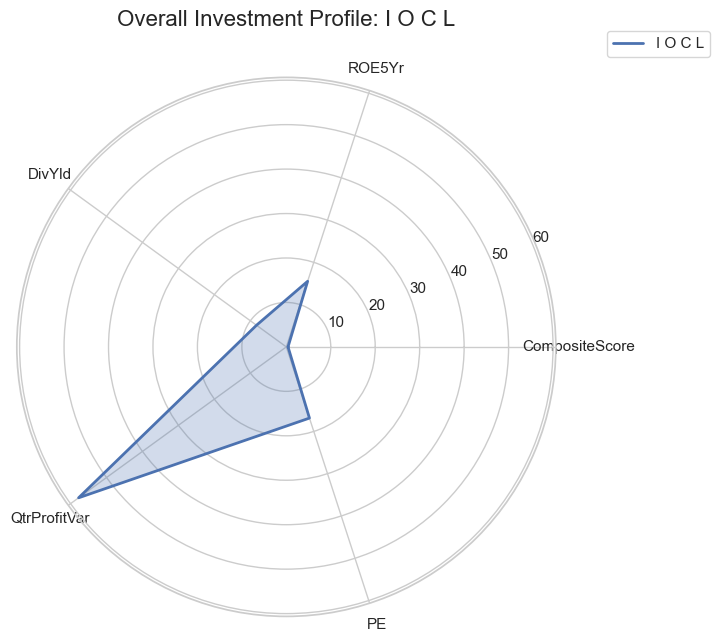

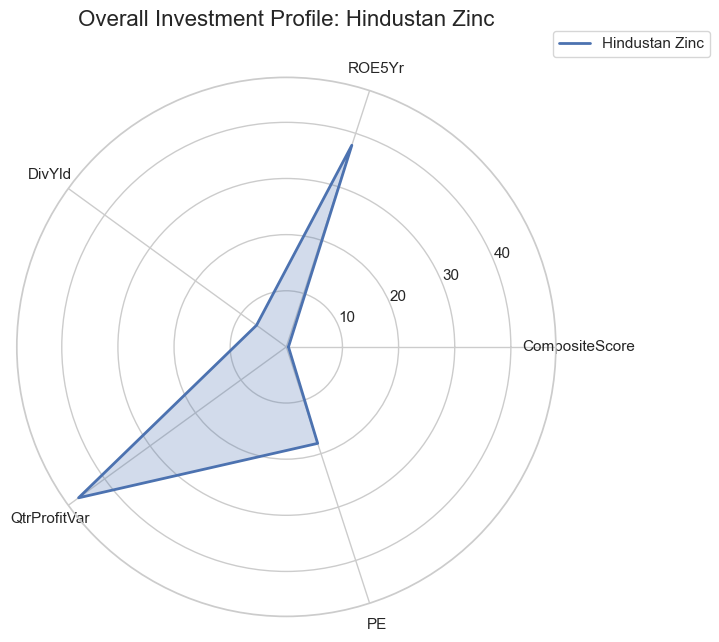

In [27]:
# Already computed 'CompositeScore' in previous steps
top5_comp = df.nlargest(5, 'CompositeScore')
categories = ['CompositeScore', 'ROE5Yr', 'DivYld', 'QtrProfitVar', 'PE']
for idx, row in top5_comp.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Overall Investment Profile: {row['Name']}")

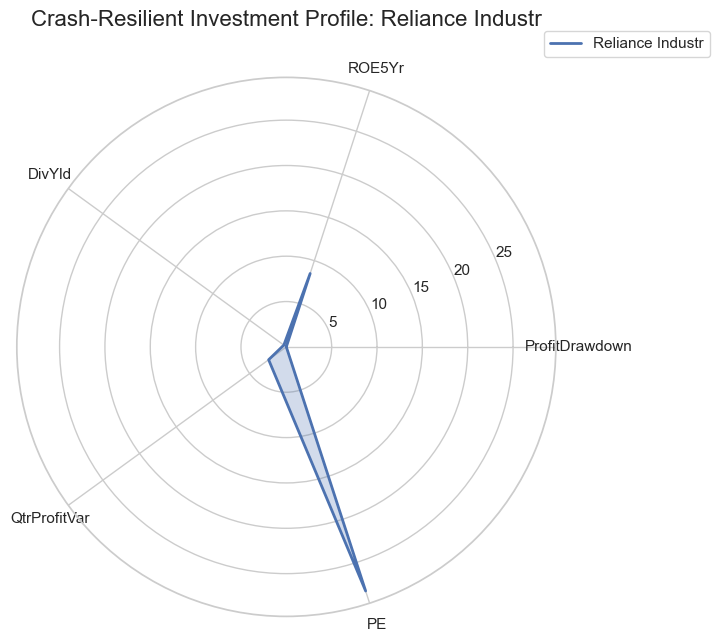

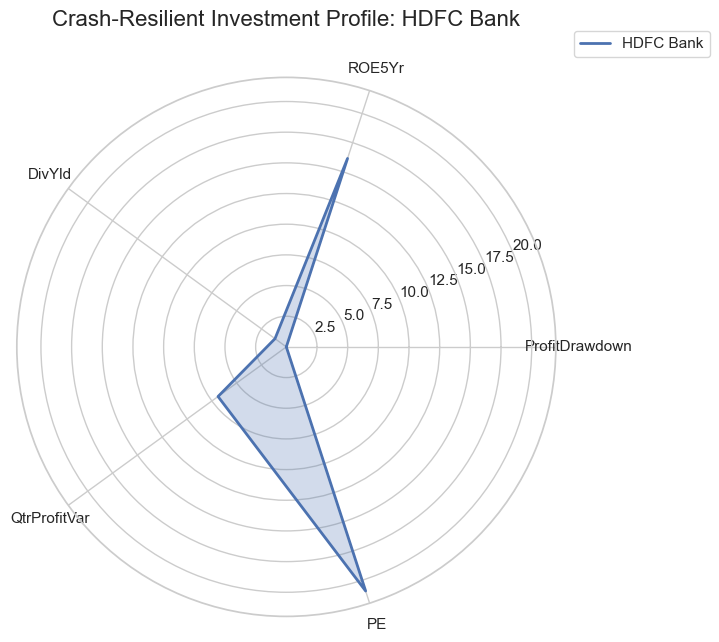

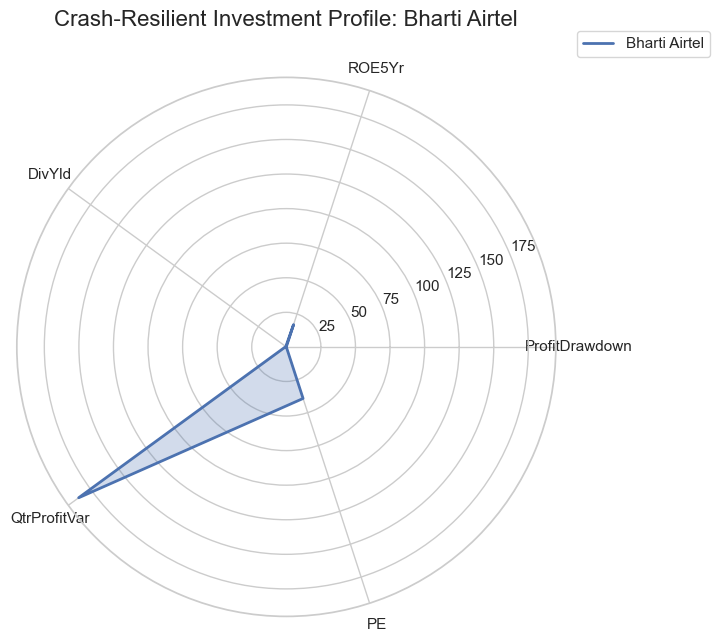

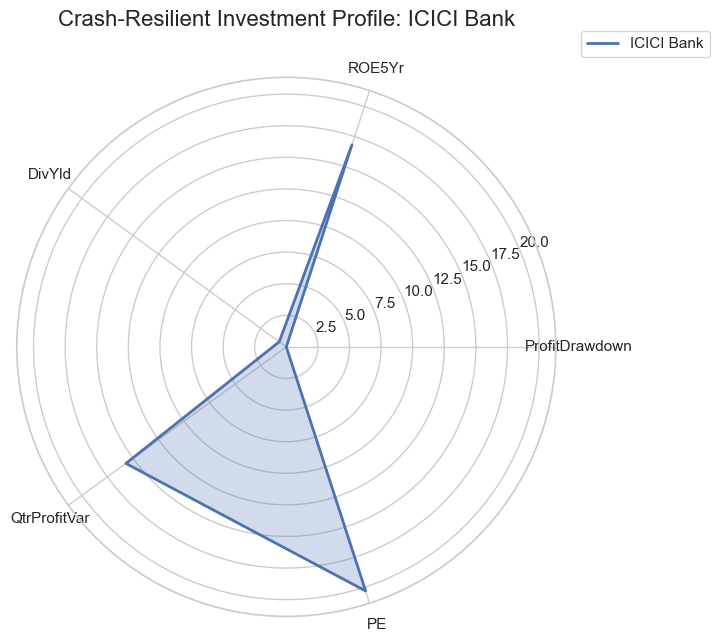

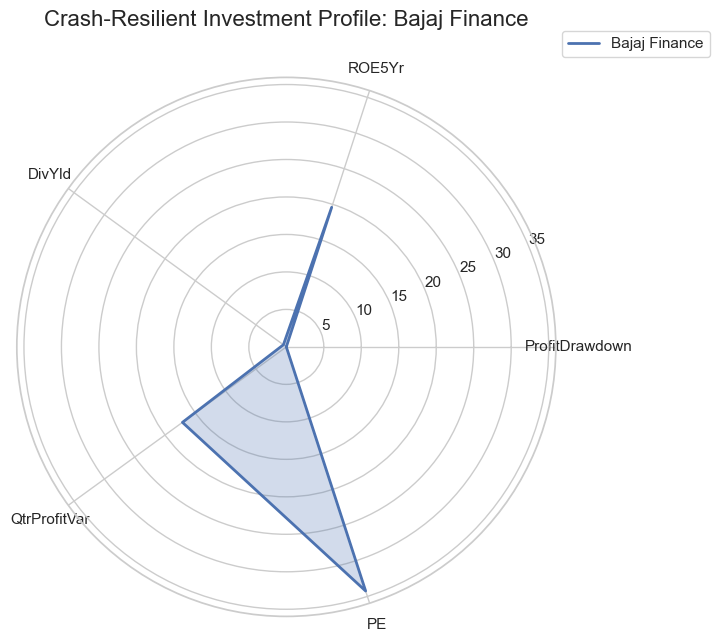

In [28]:
# Crash resilience: Lowest negative QtrProfitVar (already computed as 'ProfitDrawdown')
top5_resilient = df.nsmallest(5, 'ProfitDrawdown')
categories = ['ProfitDrawdown', 'ROE5Yr', 'DivYld', 'QtrProfitVar', 'PE']
for idx, row in top5_resilient.iterrows():
    values = [row[c] for c in categories]
    make_radar(row['Name'], values, categories, f"Crash-Resilient Investment Profile: {row['Name']}") 